In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import scipy.stats as st
from scipy.stats import t
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

In [2]:
df1 = pd.read_csv('data/measurements.csv')
df2 = pd.read_excel('data/measurements2.xlsx')

In [3]:
display(df1)
display(df2)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


# Data cleaning

In [4]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64


In [5]:
cols=[]
for col in df1.columns:
    cols.append(col.lower().replace(' ', '_'))

df2.columns = cols
df2.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [6]:
df2.drop_duplicates(inplace=True)

In [7]:
df2['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [8]:
df2['specials'].value_counts(dropna=False) #the column special is already encoded so we don't need it

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

We can drop the column refill gas because it should be the same as gas type, so it is not adding more information and it contains a lot of missing values

In [9]:
df2.drop(['refill_gas', 'specials'],axis=1, inplace=True)
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN


In [10]:
df2[df2['refill_liters'].notna()]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
44,5.4,3.3,32,21.5,7,SP98,0,0,0,37.6
82,10.5,3.6,42,20.0,10,SP98,0,0,0,37.7
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0
139,16.1,5.4,24,21.5,7,E10,0,1,0,38.0
171,44.4,4.8,38,21.5,8,E10,0,0,0,38.3
191,43.7,4.7,44,22.0,9,SP98,0,1,0,10.0
192,12.1,4.2,43,22.0,4,SP98,0,0,0,39.0
234,19.0,4.5,29,22.5,10,E10,0,0,0,39.0
274,25.7,4.9,50,22.0,10,SP98,0,1,0,41.0


Making some simple calculations we can see that it is not directly related the refill_liters, for example in the first row

In [11]:
28*(5/100)

1.4000000000000001

But maybe could be useful in the future in order to know more or less the average fulfillment  

In [12]:
df2.drop(['refill_liters'],axis=1, inplace=True)

In [13]:
df2['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [14]:
df2.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

In [15]:
df2['temp_inside'].unique()

array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

In [16]:
df2[df2['temp_inside'].isna()] #don't know how should I fill this NaN

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
93,12.4,4.7,43,NaN,10,SP98,0,0,0
95,11.8,5.3,52,NaN,11,SP98,0,0,0
97,15.7,5.3,33,NaN,9,SP98,0,0,0
98,12.9,5.7,35,NaN,9,SP98,0,0,0
99,6.4,4.4,37,NaN,10,SP98,0,0,0
100,5.3,4.1,34,NaN,9,SP98,0,0,0
102,18.8,5.0,62,NaN,9,SP98,0,1,0
201,22.2,3.8,42,NaN,15,SP98,0,0,0
203,12.6,4.1,33,NaN,17,SP98,0,0,0
261,24.5,3.9,50,NaN,15,E10,0,0,1


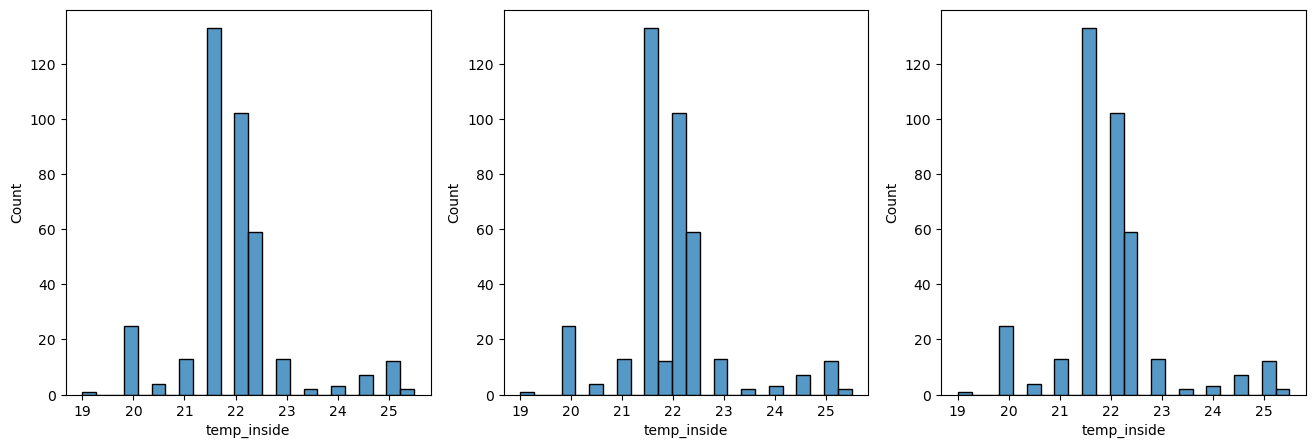

In [17]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(df2['temp_inside'], ax = ax[0])
sns.histplot(df2["temp_inside"].fillna(np.mean(df2["temp_inside"])), ax = ax[1])
sns.histplot(df2['temp_inside'].fillna(np.median(df2["temp_inside"])),ax = ax[2])
plt.show()

In [18]:
print(np.mean(df2["temp_inside"]))
print(np.median(df2["temp_inside"]))

21.929521276595743
nan


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 30.3+ KB


In [20]:
x2 = df2.drop('gas_type', axis=1) 
y2= df2['gas_type'] 

In [21]:
imputer = KNNImputer(n_neighbors=10)

x2_np = imputer.fit_transform(x2)
x2_cleaned = pd.DataFrame(x2_np, columns=x2.columns, index=x2.index)

In [22]:
x2_cleaned.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
ac              0
rain            0
sun             0
dtype: int64

In [23]:
df_cleaned = pd.concat([x2_cleaned,y2], axis=1)
df_cleaned

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,E10
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,E10
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,E10
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,E10
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,E10
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,24.5,18.0,0.0,0.0,0.0,SP98
384,16.1,4.3,38.0,25.0,31.0,1.0,0.0,0.0,SP98
385,16.0,3.8,45.0,25.0,19.0,0.0,0.0,0.0,SP98
386,15.4,4.6,42.0,25.0,31.0,1.0,0.0,0.0,SP98


# Exploratory Data Analysis (EDA)

In [24]:
def hist_generator(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(12,20))
    n = 0
    for col in df.columns:
        sns.histplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()
    plt.show()

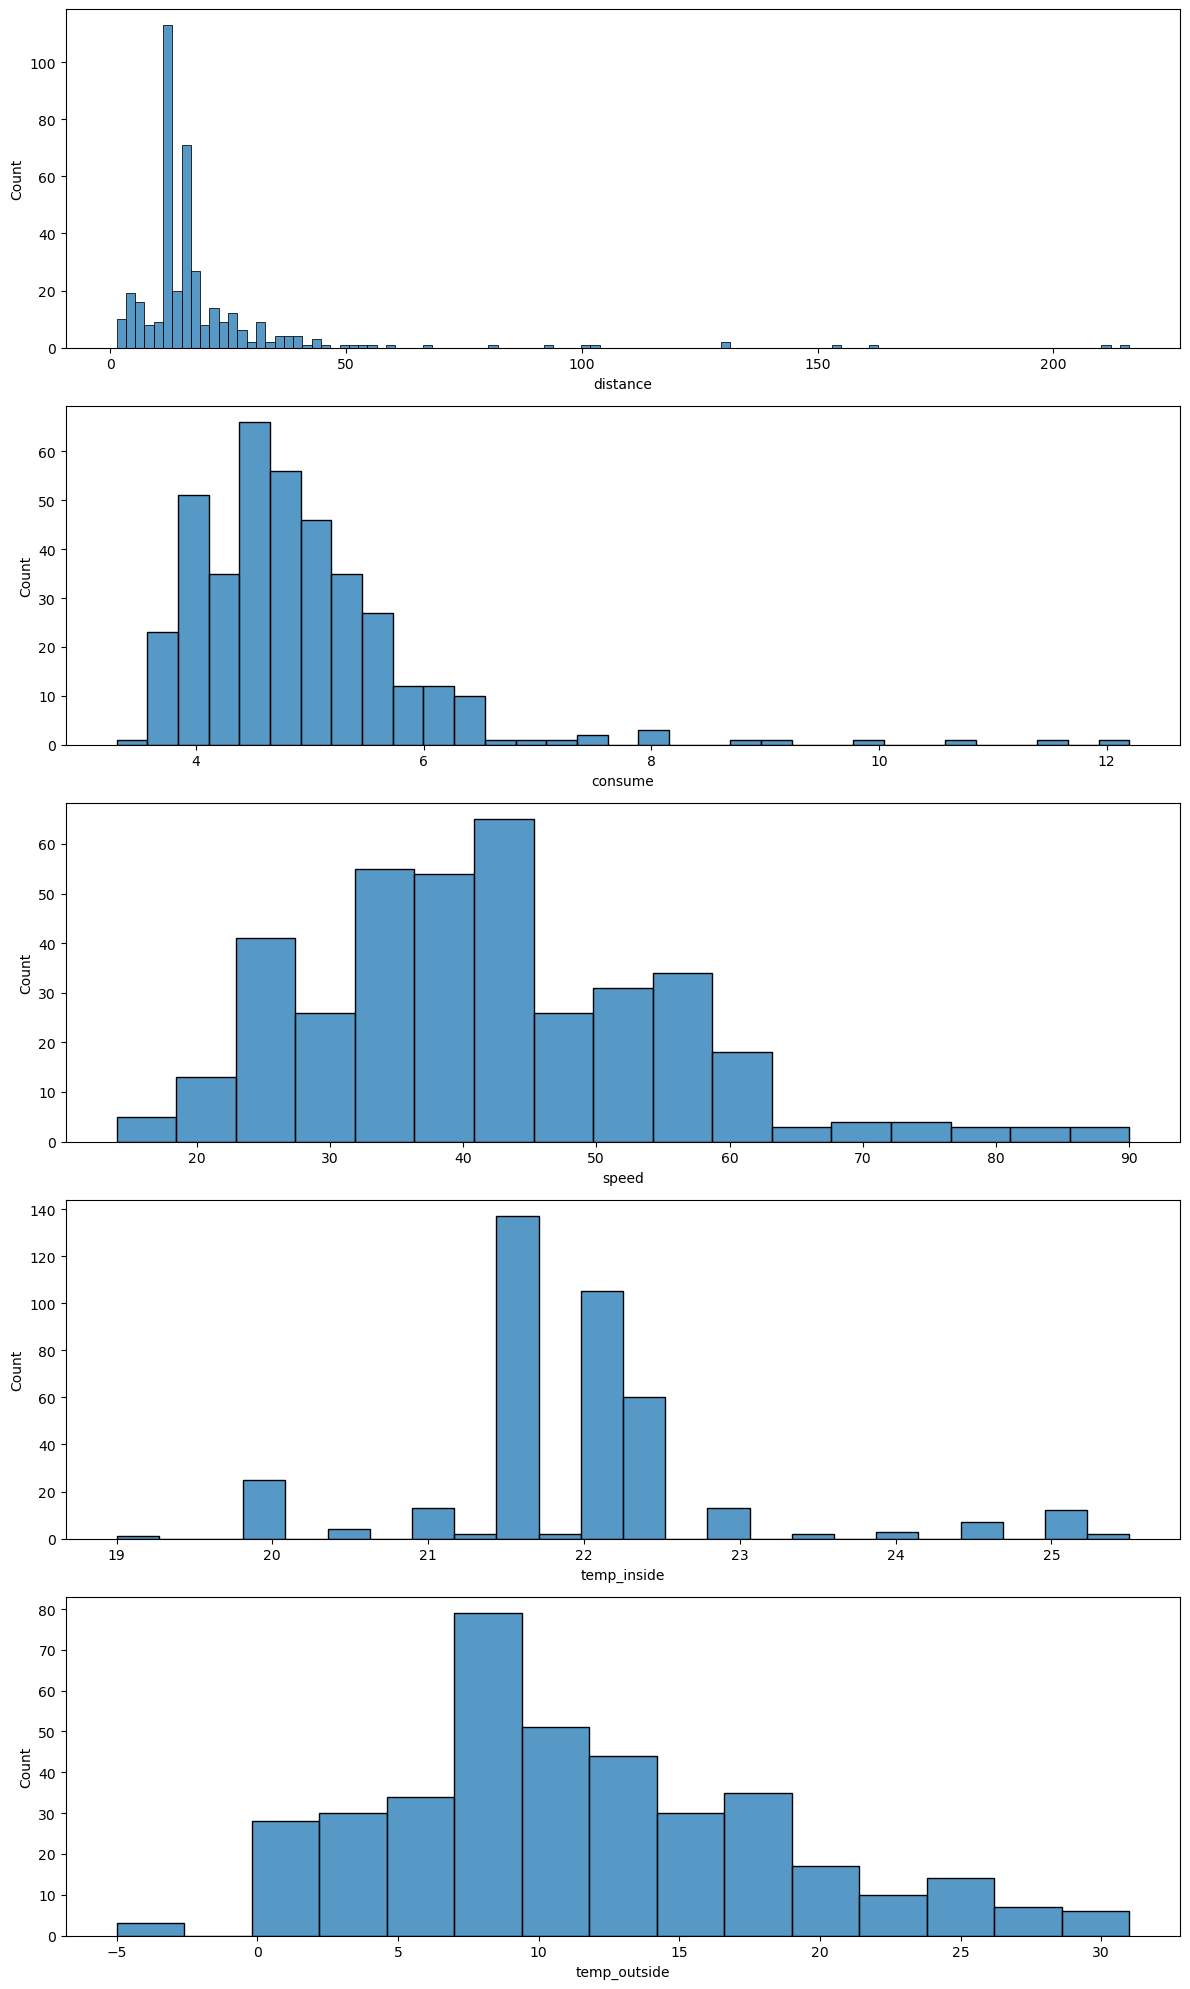

In [25]:
hist_generator(df_cleaned[['distance','consume', 'speed', 'temp_inside', 'temp_outside']])

Most of the distances are less than 50km, the most frequent comptions are aroud 4 to 6 liters per 100km, the average speed tend to be less than 60km/h, the most frequent temperature is around 20 to 23 celsius degress inside and outside the range is wider.

In [26]:
def box_generator(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for col in df.columns:
        sns.boxplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()      
    plt.show()

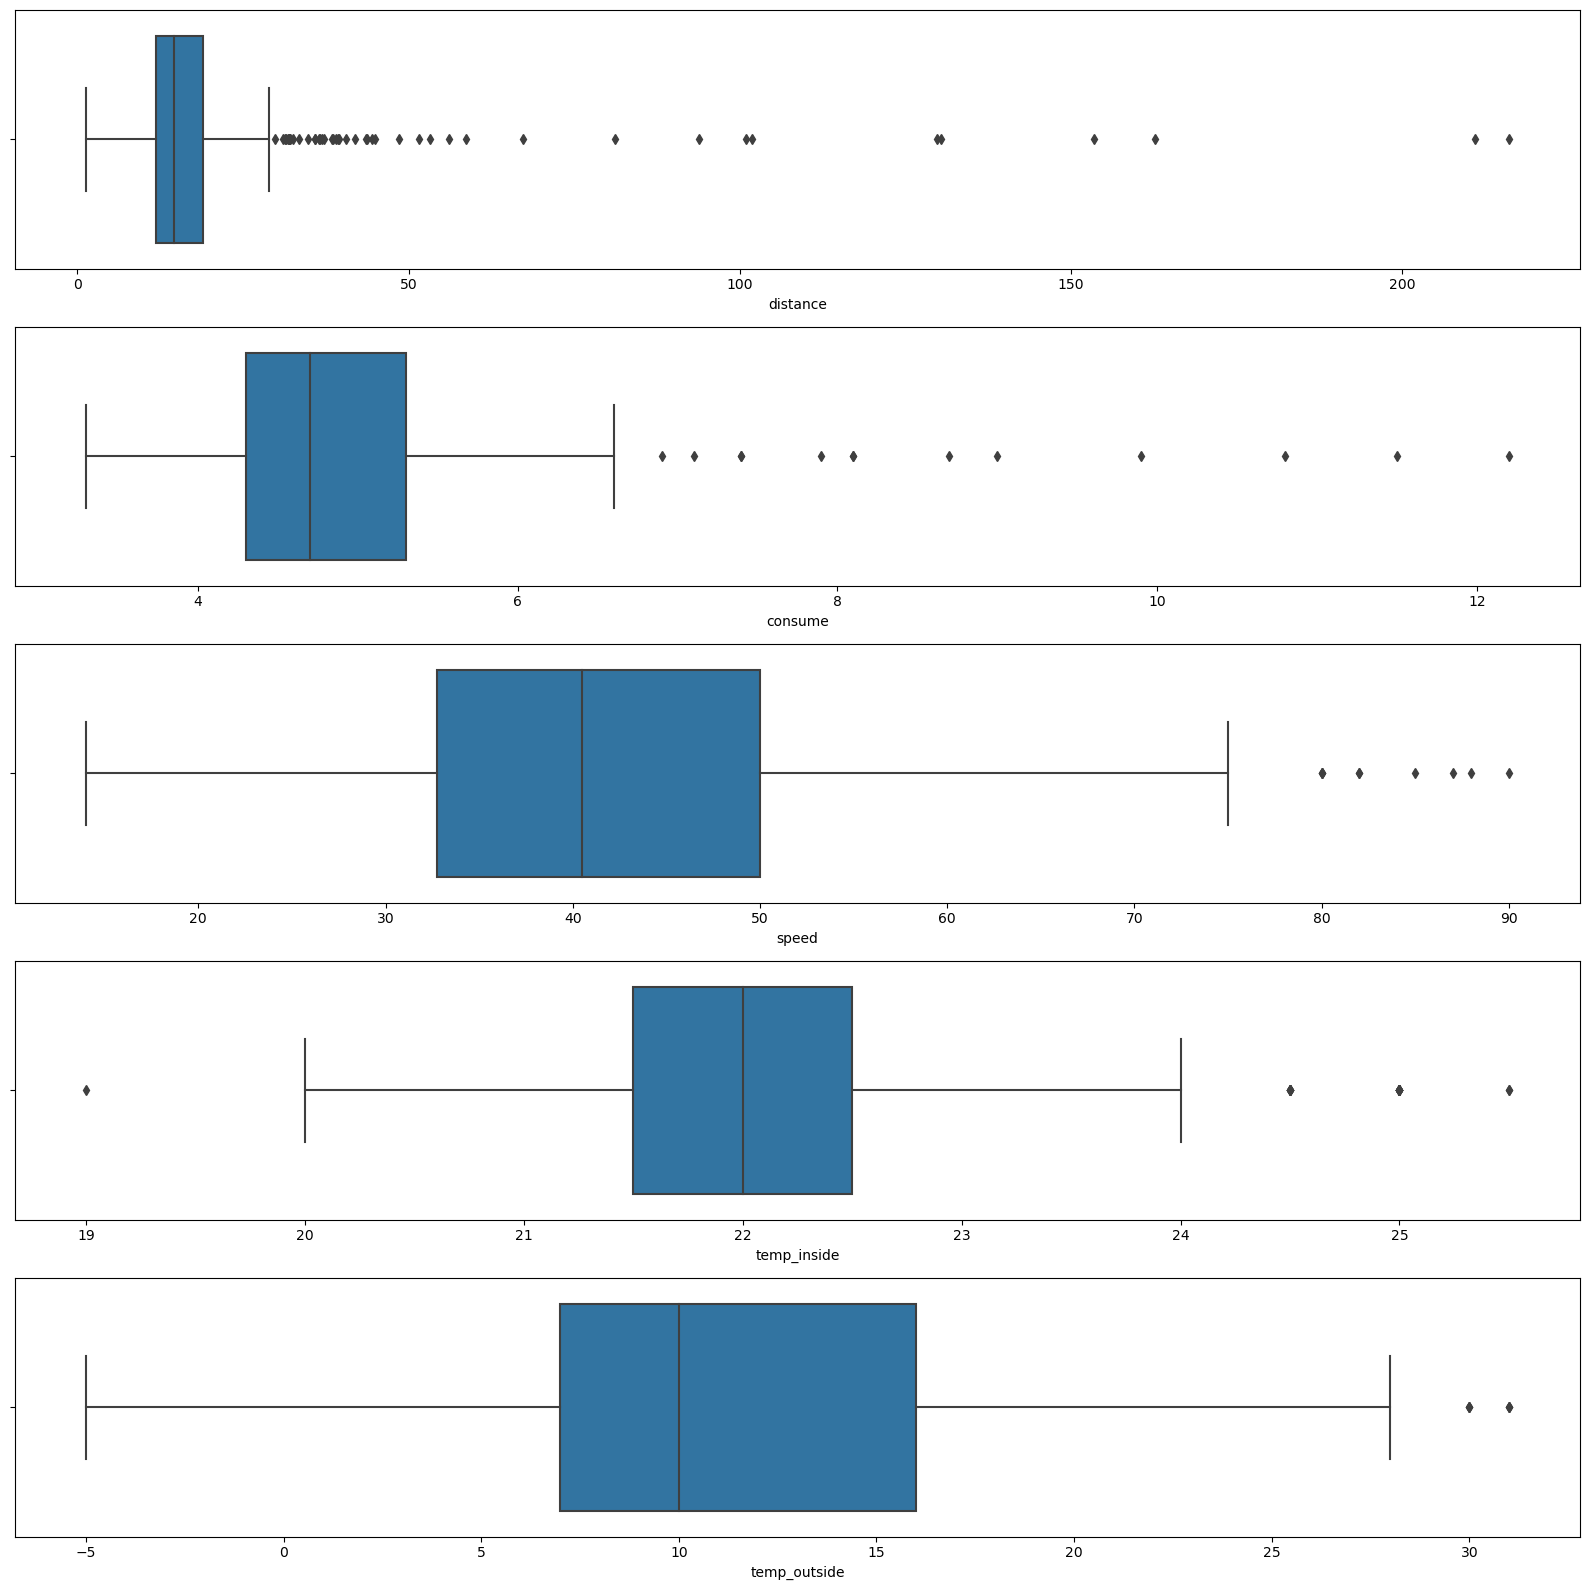

In [27]:
box_generator(df_cleaned[['distance','consume', 'speed', 'temp_inside', 'temp_outside']])

We can check that there are a lot of outliers

In [28]:
def countplot_generator(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(8,16))
    n = 0
    for col in df.columns:
        sns.countplot(data = df, x = col, ax = ax[n])
        n +=1
    plt.tight_layout()      
    plt.show()

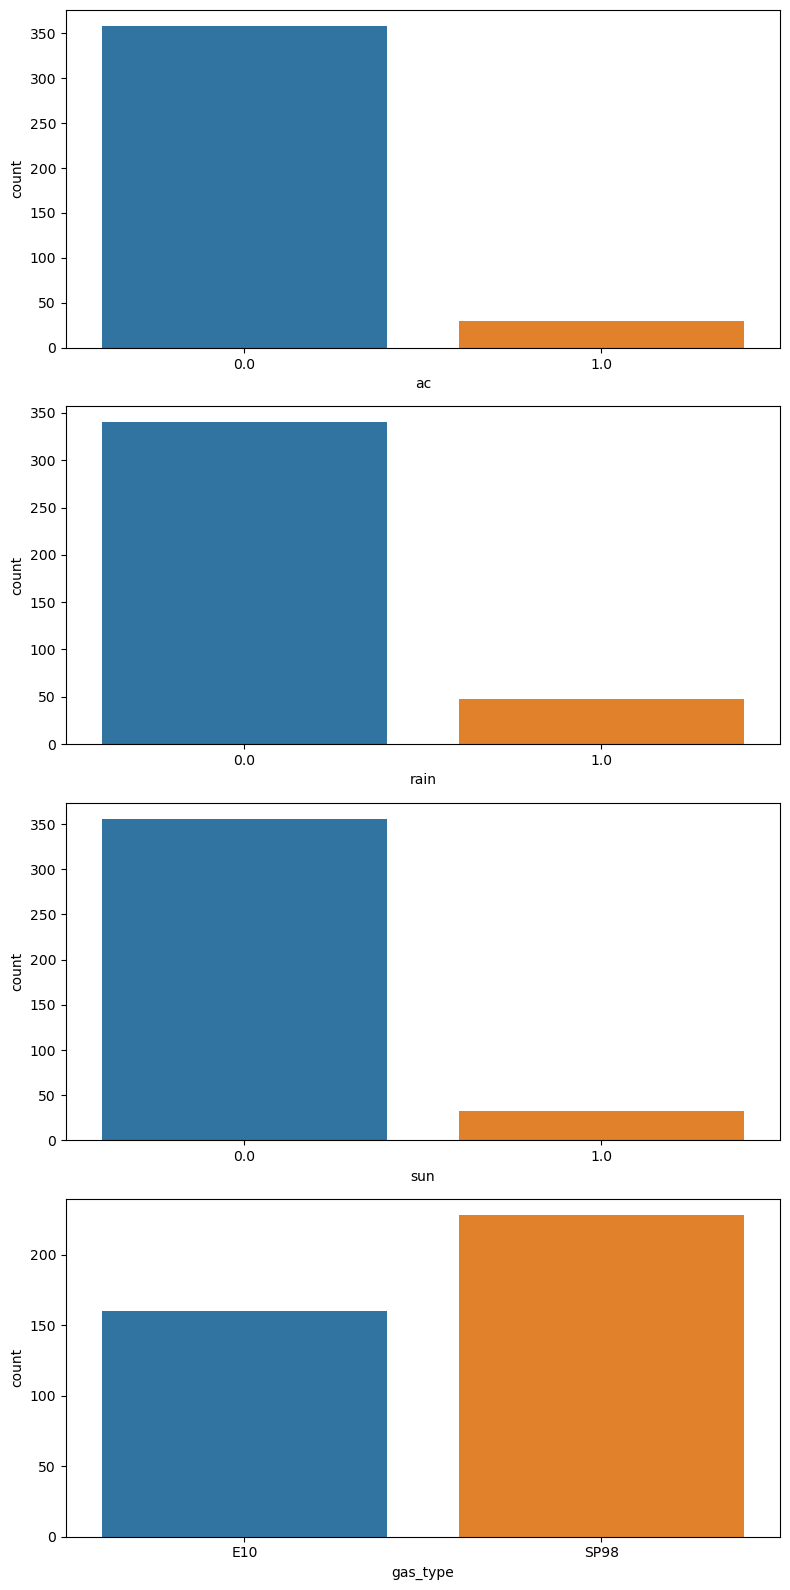

In [29]:
countplot_generator(df_cleaned[['ac', 'rain','sun','gas_type']])

Most of the cases is unknown the wheter because there were a lot of missing values, and there is a higher sample of cars using SP98 than E10.

<AxesSubplot:>

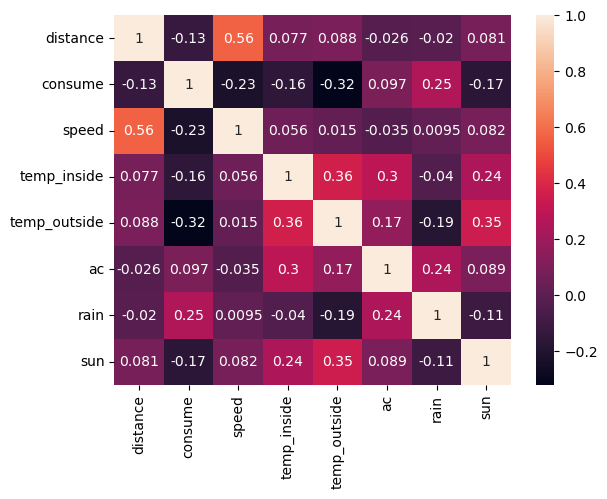

In [30]:
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True)

Not big correlations are showed

# Hypothesis testing

Being an enthusiastic person about car, it is well known that diesel cars (E10) tend to cosume less litres of fuel per 100km, so let's prove this assumption:
* H0: mean consumption of E10 < mean consumption of SP98
* H1: mean consumption of E10 >= mean consumption of SP98
* Sample: 388
* Type: One sided rejection area
* Confidence interval: 0.95

In [31]:
print(df_cleaned[df_cleaned['gas_type']=='E10']['consume'].mean())
print(df_cleaned[df_cleaned['gas_type']=='SP98']['consume'].mean())

4.931250000000001
4.899122807017543


In [32]:
df_cleaned[df_cleaned['gas_type']=='E10']['consume'].mean()

4.931250000000001

In [33]:
stat, pval = ttest_1samp(df_cleaned[df_cleaned['gas_type']=='E10']['consume'], popmean=4.93125, alternative='greater')

print(stat)
print(pval)

0.0
0.5


In [34]:
t.ppf(0.95, df=df_cleaned[df_cleaned['gas_type']=='E10'].shape[0])

1.6544329014554642

In [35]:
st.t.cdf(stat, df=df_cleaned[df_cleaned['gas_type']=='E10'].shape[0])

0.5

It seems that the consumption tends to be the same, so cannot take a conclution

# Transformations

In [36]:
#remove outliers
#power
#minmax
#SMOTE or downsampling 
#Predictions

In [37]:
def outlier_remover(df):
    df1 = df.copy()
    thr=3
    to_remove = []
    for col in df1.columns:
        sd_dw = np.mean(df1[col]) - (thr*(df1[col].std()))
        sd_up = np.mean(df1[col]) + (thr*(df1[col].std()))
        out = df1[(df1[col] < sd_dw)|(df1[col] > sd_up)]
        to_remove += list(out.index)
    df1 = df1.drop(to_remove)
    df1 = df1.reset_index(drop=True)
    return df1

In [38]:
x_before_out = df_cleaned.drop('gas_type', axis=1) 
y_before_out = df_cleaned['gas_type'] 

x_no_out=outlier_remover(x_before_out)

In [39]:
df_no_out = pd.concat([x_no_out, y_before_out], axis=1)
df_no_out = df_no_out.dropna().reset_index(drop=True)
df_no_out

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,E10
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,E10
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,E10
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,E10
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,E10
...,...,...,...,...,...,...,...,...,...
307,16.0,3.6,43.0,22.0,19.0,0.0,0.0,0.0,SP98
308,20.9,4.1,33.0,22.0,21.0,0.0,0.0,0.0,SP98
309,32.1,3.9,47.0,22.0,26.0,0.0,0.0,0.0,SP98
310,8.3,5.0,52.0,24.5,27.0,0.0,0.0,0.0,SP98
